In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.1


Evaluating All Histroy-Swapping.................... 0.7 seconds
Regret: 225.20 +/- 83.00 (median: 10.50, max: 1488.00, min: 4.00)
Evaluating All Histroy-Swapping.................... 23.4 seconds
Regret: 115.55 +/- 36.62 (median: 17.50, max: 682.00, min: -34.00)
Evaluating All Histroy-Swapping.................... 23.1 seconds
Regret: 114.25 +/- 52.57 (median: 24.50, max: 822.00, min: 13.00)
Evaluating All Histroy-Swapping.................... 24.7 seconds
Regret: 57.05 +/- 20.66 (median: 28.00, max: 444.00, min: 19.00)
Evaluating All Histroy-Swapping.................... 28.9 seconds
Regret: 59.25 +/- 9.86 (median: 40.00, max: 189.00, min: 23.00)
Evaluating All Histroy-Swapping.................... 30.9 seconds
Regret: 64.85 +/- 12.85 (median: 48.00, max: 308.00, min: 41.00)
Evaluating All Histroy-Swapping.................... 33.4 seconds
Regret: 66.45 +/- 7.78 (median: 53.50, max: 187.00, min: 43.00)
Evaluating All Histroy-Swapping.................... 36.4 seconds
Regret: 78.70 +/- 8.89 (

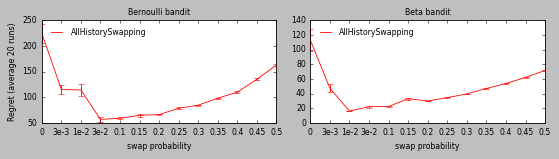

In [2]:
import datetime

swap_probs = [0, 3e-3, 1e-2, 3e-2, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
swap_probs_labels = ['0', '3e-3', '1e-2', '3e-2', '0.1', '0.15', '0.2', '0.25', 
                     '0.3', '0.35', '0.4', '0.45', '0.5'] 

x_axis = np.arange(len(swap_probs))
num_runs = 20
n = 10000
K = 10

plt.figure(figsize=(7, 2))
algs = ['AllHistorySwapping']#, 'FreshHistorySwapping']
colors = {'AllHistorySwapping':'red'}#, 'FreshHistorySwapping':'blue'}

for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for swap_prob in swap_probs:
        regret, _ = evaluate_parallel(alg_class, {"swap_prob": swap_prob}, 
                                      env, n, num_process=14)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/num_runs)
        
    plt.plot(x_axis, regret_means, colors[alg], dashes=linestyle2dashes('-'), label=alg)
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none", ecolor=colors[alg])
    plt.xticks(x_axis, swap_probs_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("swap probability")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../results/HS_vs_SwapProb_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()